# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress


# Import API key
from api_keys import weather_api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [2]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []
size = 1500
# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=size)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=size)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)
# Print the city count to confirm sufficient count
num_cities = len(cities)
num_cities
cities_no_clean_df = pd.DataFrame(cities, columns =['City'])
cities_no_clean_df.head(20)

,City
0,buala
1,hilo
2,tuatapere
3,bur gabo
4,okhotsk
5,busselton
6,la ronge
7,jamestown
8,lebu
9,taolanaro


### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [3]:
url = "http://api.openweathermap.org/data/2.5/weather?"
units = 'imperial'

#columns = ['Latitude','Longitude','Temperature','Humidity']
cities_no_clean_df['Latitude'] = ""
cities_no_clean_df['Longitude'] = ""
cities_no_clean_df['Temperature'] = ""
cities_no_clean_df['Max Temp'] = ''
cities_no_clean_df['Humidity'] = ""
cities_no_clean_df['Wind Speed (mph)'] = ''
cities_no_clean_df['Cloudiness'] = ''

#cities_no_clean_df[columns] = ''




skipped_row = []
# Build query URL
#query_url = url + 'lat=' + latitud + '&lon=' + longitud + "&appid=" + api_key + "&units=metric"

for index, row in cities_no_clean_df.iterrows():
    city_name = row['City']

    
    cities_url = url + 'q=' + city_name   + '&appid=' + weather_api_key + '&units=' + units
    city_json = requests.get(cities_url).json()
    try:
        
        cities_no_clean_df.loc[index,'Latitude'] = city_json['coord']['lat']
        cities_no_clean_df.loc[index,'Longitude'] = city_json['coord']['lon']
        cities_no_clean_df.loc[index,'Temperature'] = city_json['main']['temp']
        cities_no_clean_df.loc[index,'Max Temp'] = city_json['main']['temp_max']
        cities_no_clean_df.loc[index,'Humidity'] = city_json['main']['humidity']
        cities_no_clean_df.loc[index,'Wind Speed (mph)'] = city_json['wind']['speed']
        cities_no_clean_df.loc[index,'Cloudiness'] = city_json['clouds']['all']
        

        print(f'Processing Record {index + 1} of {num_cities} | {city_name}')
        
    except (KeyError, IndexError):
        print(f"Missing field/result... skipping row {index + 1} .")
        cities_no_clean_df.loc[index,'Latitude'] = None
        cities_no_clean_df.loc[index,'Longitude'] = None
        cities_no_clean_df.loc[index,'Temperature'] = None
        cities_no_clean_df.loc[index,'Max Temp'] = None
        cities_no_clean_df.loc[index,'Humidity'] = None
        cities_no_clean_df.loc[index,'Wind Speed (mph)'] = None
        cities_no_clean_df.loc[index,'Cloudiness'] = None
        skipped_row.append(index)
        
    

cities_no_clean_df.head(20)


Processing Record 1 of 606 | buala
Processing Record 2 of 606 | hilo
Processing Record 3 of 606 | tuatapere
Missing field/result... skipping row 4 .
Processing Record 5 of 606 | okhotsk
Processing Record 6 of 606 | busselton
Processing Record 7 of 606 | la ronge
Processing Record 8 of 606 | jamestown
Processing Record 9 of 606 | lebu
Missing field/result... skipping row 10 .
Processing Record 11 of 606 | ouesso
Processing Record 12 of 606 | butaritari
Processing Record 13 of 606 | hervey bay
Processing Record 14 of 606 | ponta do sol
Processing Record 15 of 606 | pisco
Processing Record 16 of 606 | kiama
Processing Record 17 of 606 | esperance
Processing Record 18 of 606 | kuching
Processing Record 19 of 606 | hovd
Processing Record 20 of 606 | touros
Processing Record 21 of 606 | saint-georges
Processing Record 22 of 606 | redlands
Missing field/result... skipping row 23 .
Processing Record 24 of 606 | brae
Processing Record 25 of 606 | mar del plata
Processing Record 26 of 606 | niko

Processing Record 207 of 606 | asau
Processing Record 208 of 606 | sao filipe
Processing Record 209 of 606 | nanortalik
Missing field/result... skipping row 210 .
Processing Record 211 of 606 | xining
Processing Record 212 of 606 | provideniya
Processing Record 213 of 606 | airai
Processing Record 214 of 606 | ahipara
Processing Record 215 of 606 | barranca
Processing Record 216 of 606 | guerrero negro
Processing Record 217 of 606 | almaznyy
Processing Record 218 of 606 | cidreira
Processing Record 219 of 606 | banjarmasin
Processing Record 220 of 606 | victoria
Processing Record 221 of 606 | inhambane
Processing Record 222 of 606 | marang
Processing Record 223 of 606 | kuliyapitiya
Missing field/result... skipping row 224 .
Missing field/result... skipping row 225 .
Processing Record 226 of 606 | changji
Processing Record 227 of 606 | katsuura
Processing Record 228 of 606 | castro
Processing Record 229 of 606 | saint george
Processing Record 230 of 606 | le port
Missing field/result..

Processing Record 407 of 606 | narsaq
Processing Record 408 of 606 | vanimo
Processing Record 409 of 606 | caravelas
Processing Record 410 of 606 | batagay-alyta
Processing Record 411 of 606 | makakilo city
Processing Record 412 of 606 | puerto baquerizo moreno
Processing Record 413 of 606 | great bend
Processing Record 414 of 606 | ludvika
Processing Record 415 of 606 | north myrtle beach
Processing Record 416 of 606 | port blair
Processing Record 417 of 606 | wainwright
Processing Record 418 of 606 | avera
Processing Record 419 of 606 | moose factory
Processing Record 420 of 606 | lexington
Processing Record 421 of 606 | sheridan
Processing Record 422 of 606 | komsomolskiy
Processing Record 423 of 606 | wajid
Processing Record 424 of 606 | markala
Processing Record 425 of 606 | onega
Processing Record 426 of 606 | vostok
Processing Record 427 of 606 | pascagoula
Processing Record 428 of 606 | drugovo
Processing Record 429 of 606 | ilulissat
Processing Record 430 of 606 | bunbury
Proc

,City,Latitude,Longitude,Temperature,Max Temp,Humidity,Wind Speed (mph),Cloudiness
0,buala,-8.145,159.592,81.45,81.45,79,3.13,99
1,hilo,19.7297,-155.09,70.48,78.8,65,3.44,90
2,tuatapere,-46.1333,167.683,55,55,93,15.01,97
3,bur gabo,None,None,None,None,None,None,None
4,okhotsk,59.3833,143.3,39.04,39.04,72,2.64,55
5,busselton,-33.65,115.333,62.01,62.01,95,1.99,100
6,la ronge,55.1001,-105.284,28.4,28.4,69,3.44,59
7,jamestown,42.097,-79.2353,60.03,60.8,94,6.91,90
8,lebu,-37.6167,-73.65,53.69,53.69,89,3.18,74
9,taolanaro,None,None,None,None,None,None,None


In [4]:
cities_url = url + 'q=' + 'puerto ayora'   + '&appid=' + weather_api_key + '&units=' + units

requests.get(cities_url).json()
print(len(cities_no_clean_df))

606


### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [5]:
cities_df = cities_no_clean_df.dropna().reset_index(drop=True)

cities_df.to_csv(output_data_file, index = False)
print(len(cities_df))
cities_df.head(30)

558


,City,Latitude,Longitude,Temperature,Max Temp,Humidity,Wind Speed (mph),Cloudiness
0,buala,-8.145,159.592,81.45,81.45,79,3.13,99
1,hilo,19.7297,-155.09,70.48,78.8,65,3.44,90
2,tuatapere,-46.1333,167.683,55,55,93,15.01,97
3,okhotsk,59.3833,143.3,39.04,39.04,72,2.64,55
4,busselton,-33.65,115.333,62.01,62.01,95,1.99,100
5,la ronge,55.1001,-105.284,28.4,28.4,69,3.44,59
6,jamestown,42.097,-79.2353,60.03,60.8,94,6.91,90
7,lebu,-37.6167,-73.65,53.69,53.69,89,3.18,74
8,ouesso,1.6136,16.0517,72.72,72.72,94,1.07,100
9,butaritari,3.0707,172.79,82.94,82.94,72,9.13,95


## Inspect the data and remove the cities where the humidity > 100%.
----
Skip this step if there are no cities that have humidity > 100%. 

In [6]:
cities_humidity_df = cities_df.loc[cities_df['Humidity'] <=100,:]
print(len(cities_humidity_df))
cities_humidity_df.head()


558


,City,Latitude,Longitude,Temperature,Max Temp,Humidity,Wind Speed (mph),Cloudiness
0,buala,-8.145,159.592,81.45,81.45,79,3.13,99
1,hilo,19.7297,-155.09,70.48,78.8,65,3.44,90
2,tuatapere,-46.1333,167.683,55,55,93,15.01,97
3,okhotsk,59.3833,143.3,39.04,39.04,72,2.64,55
4,busselton,-33.65,115.333,62.01,62.01,95,1.99,100


In [7]:
#  Get the indices of cities that have humidity over 100%.
cities_humidity_100_df = cities_df.loc[cities_df['Humidity'] > 100,:]
cities_humidity_100_df.index.to_numpy()
cities_humidity_100_df

,City,Latitude,Longitude,Temperature,Max Temp,Humidity,Wind Speed (mph),Cloudiness


In [8]:
# Make a new DataFrame equal to the city data to drop all humidity outliers by index.
# Passing "inplace=False" will make a copy of the city_data DataFrame, which we call "clean_city_data".


## Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

## Latitude vs. Temperature Plot

(-95, 95)

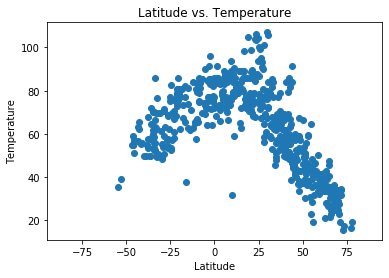

In [9]:
latitude = cities_humidity_df['Latitude']
temperature = cities_humidity_df['Temperature']

humidity = cities_humidity_df['Humidity']
cloudiness = cities_humidity_df['Cloudiness']
wind_speed = cities_humidity_df['Wind Speed (mph)']

lat_temp = plt.scatter(x = latitude,y = temperature)
plt.title('Latitude vs. Temperature')
plt.xlabel('Latitude')
plt.ylabel('Temperature')
plt.xlim(-95,95)


## Latitude vs. Humidity Plot

(-95, 95)

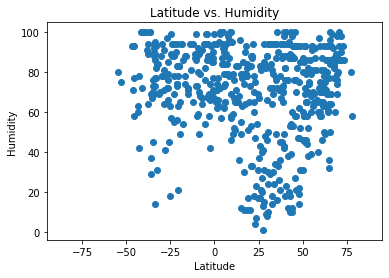

In [10]:
lat_humidity = plt.scatter(x = latitude,y = humidity)
plt.title('Latitude vs. Humidity')
plt.xlabel('Latitude')
plt.ylabel('Humidity')
plt.xlim(-95,95)

## Latitude vs. Cloudiness Plot

(-95, 95)

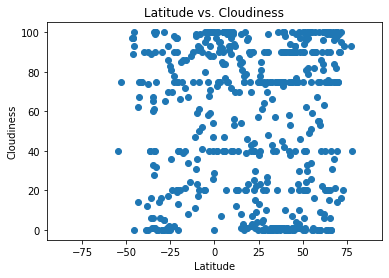

In [11]:
lat_cloudiness = plt.scatter(x = latitude,y = cloudiness)
plt.title('Latitude vs. Cloudiness')
plt.xlabel('Latitude')
plt.ylabel('Cloudiness')
plt.xlim(-95,95)

## Latitude vs. Wind Speed Plot

(-95, 95)

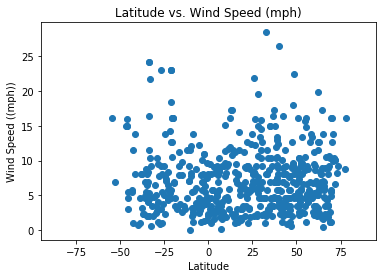

In [12]:
lat_wind = plt.scatter(x = latitude,y = wind_speed)
plt.title('Latitude vs. Wind Speed (mph)')
plt.xlabel('Latitude')
plt.ylabel('Wind Speed ((mph))')
plt.xlim(-95,95)

## Linear Regression

In [13]:
northern = cities_humidity_df.loc[cities_humidity_df['Latitude']>=0,:]
northern_lat = northern['Latitude']
southern = cities_humidity_df.loc[cities_humidity_df['Latitude']<0,:]
southern_lat = southern['Latitude']

print(len(northern_lat))
print(len(northern['Max Temp']))

392
392


####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

In [14]:
# Perform a linear regression on year versus violent crime rate
#vc_slope, vc_int, vc_r, vc_p, vc_std_err = stats.linregress(northern_lat, northern['Max Temp'])
northern['Max Temp']

1       78.8
3      39.04
5       28.4
6       60.8
8      72.72
       ...  
551    55.99
552     46.4
555    60.01
556    41.41
557     72.5
Name: Max Temp, Length: 392, dtype: object

####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression